# Practice Session 07: Network models


Author: <font color="blue">Nil Tomàs Plans</font>

E-mail: <font color="blue">nil.tomas01@estudiant.upf.edu</font>

Date: <font color="blue">30/10/2023</font>

# 1. Random (ER) graph generator

In [131]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import itertools

from collections import OrderedDict

In [132]:
# Leave as-is

def flip_coin(p):
    if np.random.random() < p:
        return True
    else:
        return False

## 1.1. Generate ER graph

In [142]:
#code for generate_random_graph(N,p), include comments to explain what you are doing at each step
def generate_random_graph(N,p):#creo la funció
    g=nx.Graph()#inicialitzem el graf
    for i in range(N):#primer creem tots els nodes del graf afegint-los a g amb add_node()
        g.add_node(i)
    for u,v in itertools.combinations(g.nodes,2):# ara si la probabilitat aleatòria és <p afegirem un enllaç entre els dos nodes, i si no no
        #recorrem totes les combinacions de nodes
        if (np.random.random()<p):
            g.add_edge(u,v)#afegim un edge entre el node u i v
            
    return g  #retorno el graf
    
    


In [143]:
#code to generate 300 graphs and keep their number of edges in the array observed_edges
observed_edges=[] #array observed_edges
N=10 #defineixo 10 nodes per a cada graf i amb una probabilitat p de 0.4
p=0.4
for i in range (300): #a cada iteració creo un nou graf, i afegim amb la funció number_of_edges() els enllaços del graf a la llista
    graf=generate_random_graph(N,p)
    observed_edges.append(graf.number_of_edges())
    
    
print(observed_edges) #imprimeixo el numero de edges de cada graf

expected_edges=p*(N*(N-1)/2) #la formula d'expected edges=p*(N*(N-1)/2) ER model
trials=300 #el numero d'experiments són 300


[18, 20, 17, 21, 16, 23, 22, 18, 14, 16, 22, 16, 15, 19, 24, 16, 19, 15, 19, 17, 17, 19, 20, 21, 18, 16, 20, 15, 14, 12, 19, 21, 19, 14, 16, 21, 14, 15, 21, 19, 20, 19, 14, 19, 17, 18, 16, 21, 18, 19, 14, 16, 24, 18, 15, 16, 13, 16, 21, 19, 16, 22, 20, 19, 17, 19, 20, 17, 18, 19, 18, 17, 16, 19, 20, 22, 16, 17, 29, 16, 17, 22, 20, 15, 21, 23, 13, 18, 13, 20, 18, 18, 16, 20, 23, 24, 15, 10, 12, 25, 17, 24, 17, 11, 18, 19, 17, 18, 19, 16, 15, 19, 17, 17, 21, 12, 16, 20, 21, 16, 12, 19, 24, 18, 21, 17, 14, 24, 20, 18, 15, 11, 14, 18, 15, 23, 20, 17, 18, 18, 19, 19, 12, 15, 17, 21, 23, 18, 17, 22, 16, 25, 20, 13, 15, 21, 21, 21, 19, 18, 19, 17, 14, 22, 17, 19, 18, 19, 21, 16, 19, 13, 15, 18, 17, 20, 18, 23, 17, 17, 21, 18, 24, 17, 18, 22, 17, 17, 18, 17, 19, 16, 20, 17, 15, 22, 19, 21, 19, 20, 16, 20, 19, 21, 23, 24, 22, 15, 21, 16, 15, 22, 12, 16, 16, 21, 22, 17, 14, 18, 20, 19, 14, 16, 21, 14, 19, 17, 23, 20, 15, 22, 15, 20, 21, 18, 20, 21, 20, 21, 22, 15, 22, 19, 20, 21, 15, 20, 17, 24,

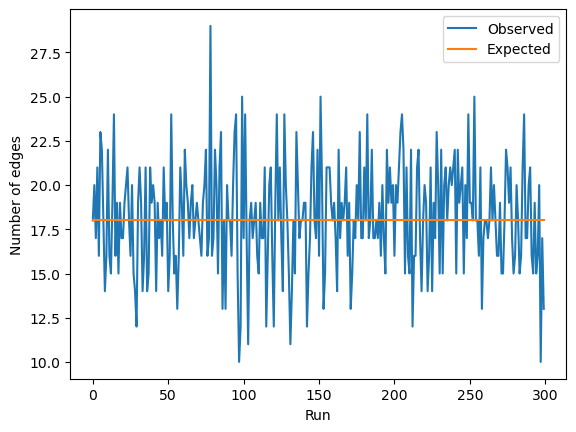

In [144]:
# Leave as-is

plt.xlabel("Run")
plt.ylabel("Number of edges")
plt.plot(range(trials), observed_edges, label="Observed")
plt.plot(range(trials), [expected_edges] * trials, label="Expected")
plt.legend()
plt.show()

In [145]:
#code for generate_random_graph_avg_degree

def generate_random_graph_avg_degree(N,kavg):#defineixo la funció
    prob=kavg/(N-1)  #de teoria sabem que 
    return generate_random_graph(N,prob)#substituim a la funció
#he afegit un return a la funció, ja que si no en apartats ens produirà un error de què no s'ha generat cap graf, degut a què no hi havia un return aqui
    
    

In [65]:
def graph_average_degree(g):#inicialment havia creat la funció amb dos paràmetres d'entrada N i p, però després he vist que en el moment de calcular les iteracions necessitava passar el graf g com a paràmetre
    #per a calcular el average degree
    numero_nodes=g.number_of_nodes()#per a calcular el numero de nodes i enllaços utilitzem les funcions respectives
    numero_enllaços=g.number_of_edges()
    if (numero_nodes!=0):#comprovo que el numero de nodes és diferent a zero per evitar problemes en la divisió
        total=2*numero_enllaços/numero_nodes #<k>=2*(<L>/N)
    else: total=0
    return total #retorno el grau mitjà del graf

N=10#estableixo el numero de nodes que tindrà cada graf
#a l'enunciat no fa referència a crear 2 llistes, ja que al proper apartat produeix la gràfica amb base dos llistes
#així doncs icicio les llistes
target_average_degrees=[]
observed_average_degrees=[]

for i in range (31):#del 0.0 al 3.0 amb increments de 0.1 hi han 30 repeticions (inclòs el 30) per això és 31
    expected_av_degree=i*0.1#aquí calculem el expected average degree donada la i *0.1 per a retornar els valors en l'intèrval que ens demanen (0.0,3.0)
    target_average_degrees.append(expected_av_degree)#afegeixo a la llista el valor
    g=generate_random_graph_avg_degree(N, expected_av_degree)#creem el graf que se'ns demana de forma random amb els respectius paràmetres d'entrada
    observed_average_degree=graph_average_degree(g)#i tot seguit passem el graf per la funció que calcula l'average degree del graf i el guardem a la variable, per a afegir-la després a la llista observed_av_degrees
    observed_average_degrees.append(observed_average_degree)
    

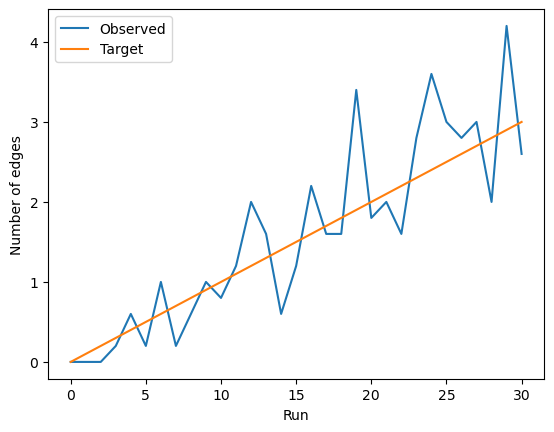

In [66]:
# Leave as-is

plt.xlabel("Run")
plt.ylabel("Number of edges")
plt.plot(range(len(target_average_degrees)), observed_average_degrees, label="Observed")
plt.plot(range(len(target_average_degrees)), target_average_degrees, label="Target")
plt.legend()
plt.show()

## 1.2. Measure connectivity


In [70]:
def is_connected(g):#defineixo la funció
    for u,v in itertools.combinations(g.nodes,2):#reiterem per a cada parell de nodes totes les combinacions de connexions amb altres nodes utilitzant itertools.combinations(G.nodes, 2), i ho farà per tots els nodes
        if not nx.has_path(g,u,v):#tot seguit si ja de primeres no hi ha un camí entre dos nodes diem que no està connectat
            return False
    return True #si la condició anterior no passa mai aleshores estarà connectat

In [71]:
# Leave as-is

def size_largest_cc(G):
    
    # Obtain the list of connected components of the graph sorted from largest to smallest
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    
    # Selects the first connected component in that list
    G0 = G.subgraph(Gcc[0])
    
    # Returns its number of nodes
    return G0.number_of_nodes()

In [73]:

N = 500
target_average_degrees = np.arange(0.3, 3.0, 0.05)

largest_cc_sizes = []
average_degrees = []

for target_average_degree in target_average_degrees:
    
    # Generate graph
    g = generate_random_graph_avg_degree(N, target_average_degree)
    assert g.number_of_nodes() == N, "Wrong number of nodes"
    
    # Obtain observed average degree
    total=0 #contador
    for i in g.nodes:#a cada iteració, recorrem un node del graf g i sumem el seu grau al contador
        total+=g.degree[i]
    average_degree = total/N   # finalment com que volem obtenir l'average, hem de dividir el total (que és la suma) pels nodes N 
    average_degrees.append(average_degree)
    
    # Obtain size of largest connected component as a fraction of the total number of nodes
    largest_cc_size = size_largest_cc(g)/N   # passem el graf "g" per la funció size_largest_cc que ens retornarà en numero de nodes, 
    #i tot seguit ho dividirem per N ja que ho voldrem expressar com una fracció dels nodes totals
    largest_cc_sizes.append(largest_cc_size)



    


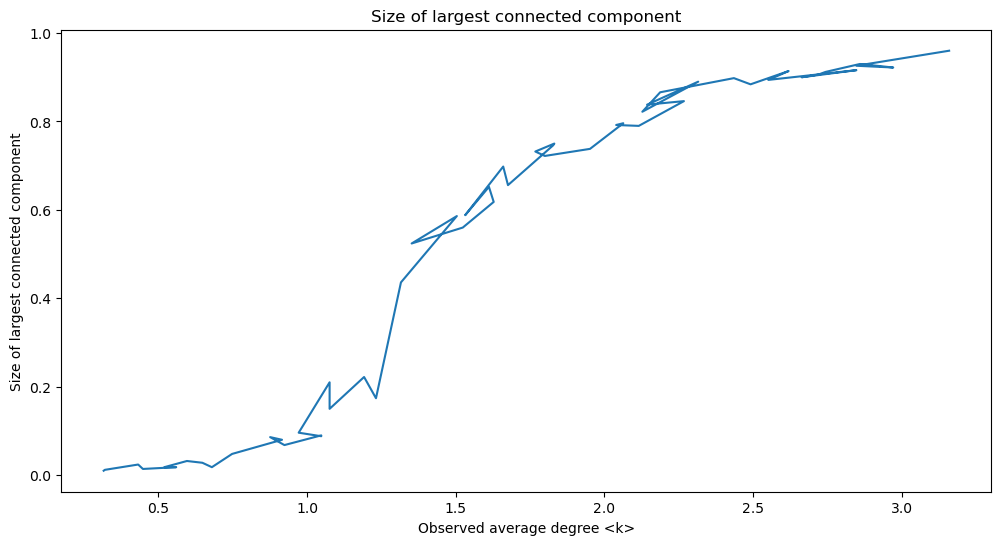

In [74]:
# LEAVE AS-IS

plt.figure(figsize=(12,6))
plt.plot(average_degrees, largest_cc_sizes)
plt.title("Size of largest connected component")
plt.xlabel("Observed average degree <k>")
plt.ylabel("Size of largest connected component")
plt.show()

<font size="+1" color="blue">Answer the following questions.
(1) At which average degree does the theory say that the size of the largest connected component should increase? Hauria de començar a créixer un cop passi el punt crític (<k>=1), 
ja que volrà dir que de mitjana tots els nodes estan enllaçats amb algun altre.
(2) At which average degree does it increase in this particular case? Hi ha un increment molt marcat al voltant de <k>=1.25
(3) Why is the resulting curve not a function (specifically, why is it not univalent)? Ja Que són valors discrets els que hem calculat, és a dir valors individuals, que després s ajunten entre ells amb rectes a dins la gràfica
</font>

## 1.3. Visualize graphs and plot degree distributions

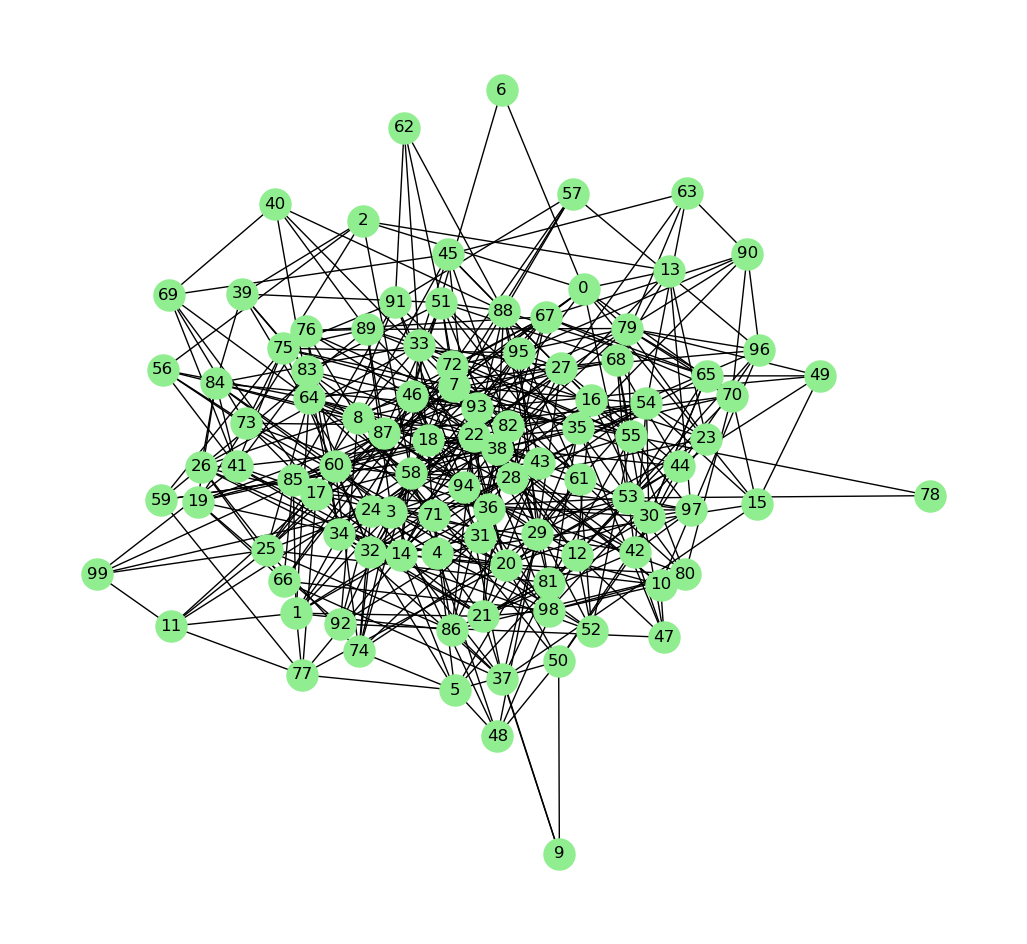

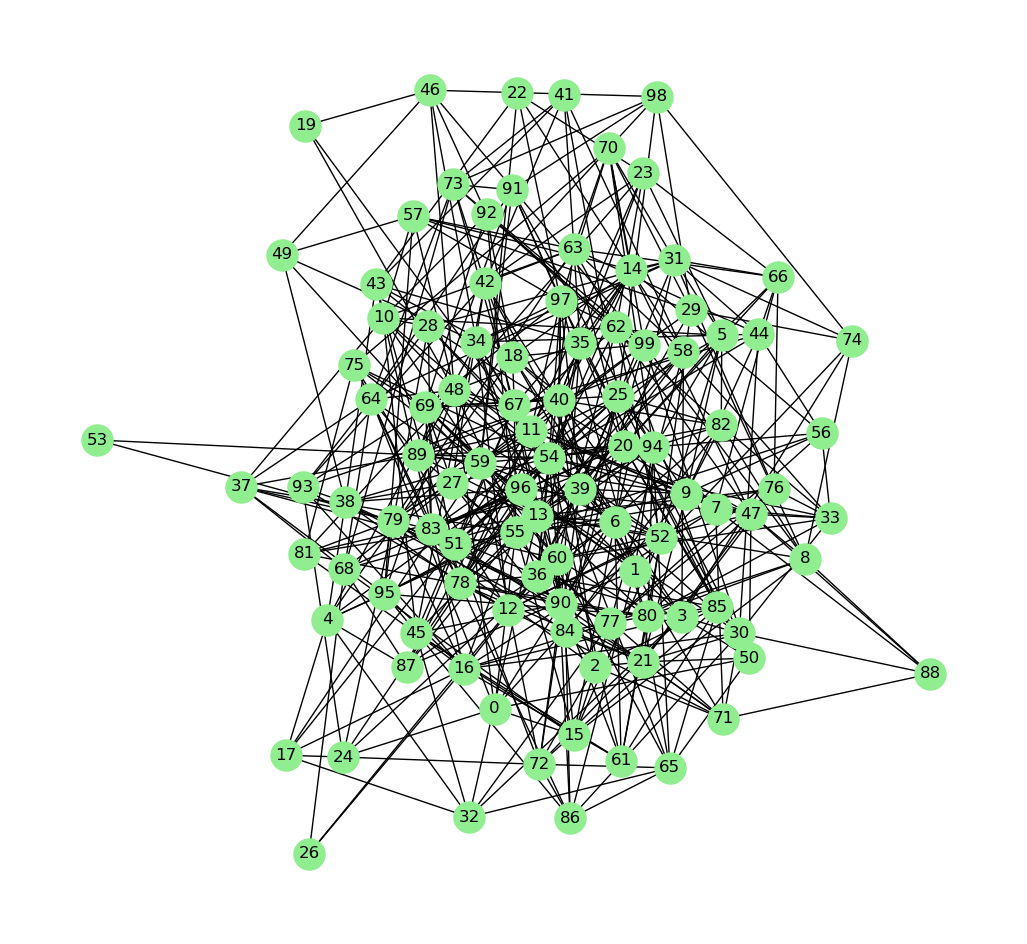

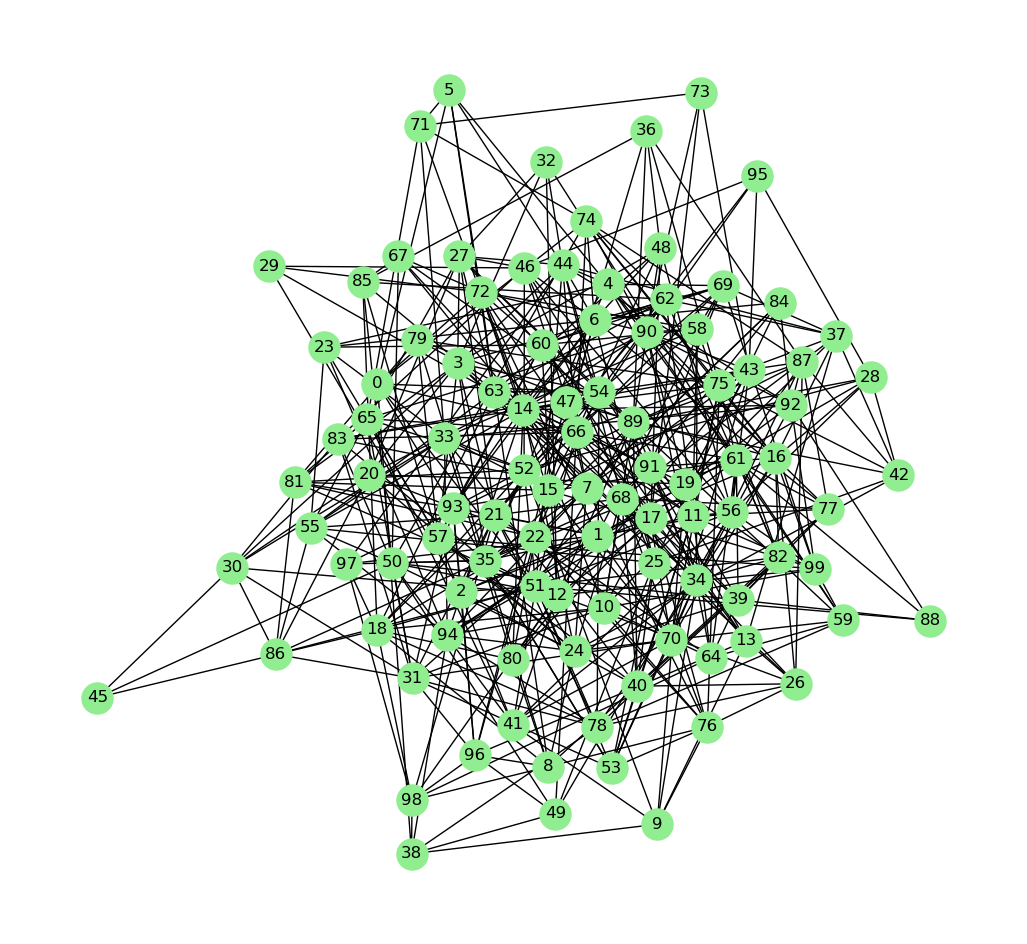

In [85]:
#code to generate and visualize 3 ER graphs of about 100 nodes each. Make sure all the graphs you generate are connected, check them with your is_connected(g) function

N=100#numero de nodes de cada graf i probabilitat de trobar enllaç, (ja que utilitzo la funció que he creat inicialment de generate random graph) i necessito una probabiliatat
p=0.1#Si donem una probabilitat molt alta, farem que hi hagin més probabilitats d'haver-hi enllaços, i per tant el graf serà més dens
for i in range(3):#a cada iteració creem un graf
    g=generate_random_graph(N,p)
    if is_connected(g):
        plt.figure(figsize=(13,12))
        plt.axis('off')
        pos=nx.spring_layout(g)
        nx.draw_networkx(g, pos, with_labels=True, node_size=500, node_color='lightgreen')
        plt.show()
   
    

In [96]:
#code for print_er_statistics, and execute it over each of the three generated graphs
def print_er_statistics(g,p):
    #definició de variables
    k=graph_average_degree(g)#passem el graf per la funció graph_average_degree(), i ens retornarà que k=L/N
    exp_av_deg=p*(N-1)#<k>=p*(N-1)
    print("Observed average degree: ",k," and expected average degree: ",exp_av_deg)#imprimim els paràmetres

N=100
p=0.1
for i in range(3):#utilitzant el codi anterior, imprimim les estadístiques  de ER dels 3 grafs. Podem observar que l'expected average degree és sempre el mateix ja que no canviem la N ni la p
    #en canvi l'observed average degree anirà canviant a cada execució
    g=generate_random_graph(N,p)
    if is_connected(g):
        print_er_statistics(g,p)

Observed average degree:  10.32  and expected average degree:  9.9
Observed average degree:  9.22  and expected average degree:  9.9
Observed average degree:  8.94  and expected average degree:  9.9


In [97]:
# Leave as-is or modify if you want

def plot_degree_distribution(g):
    degree_dict = dict(g.degree())
    degree_ordered = OrderedDict(sorted(degree_dict.items(), key=lambda x: x[1], reverse=True))
    degree_sequence = list(degree_ordered.values())
    prob, bin_edges = np.histogram(degree_sequence, bins=range(1,np.max(degree_sequence)+2), density=True)
    plt.figure(figsize=(12,6))
    plt.loglog(bin_edges[:-1], prob, 'o-')
    plt.title("Probability density function")
    plt.xlabel("degree")
    plt.ylabel("probability")
    plt.autoscale(enable=True, axis='both')
    plt.show()

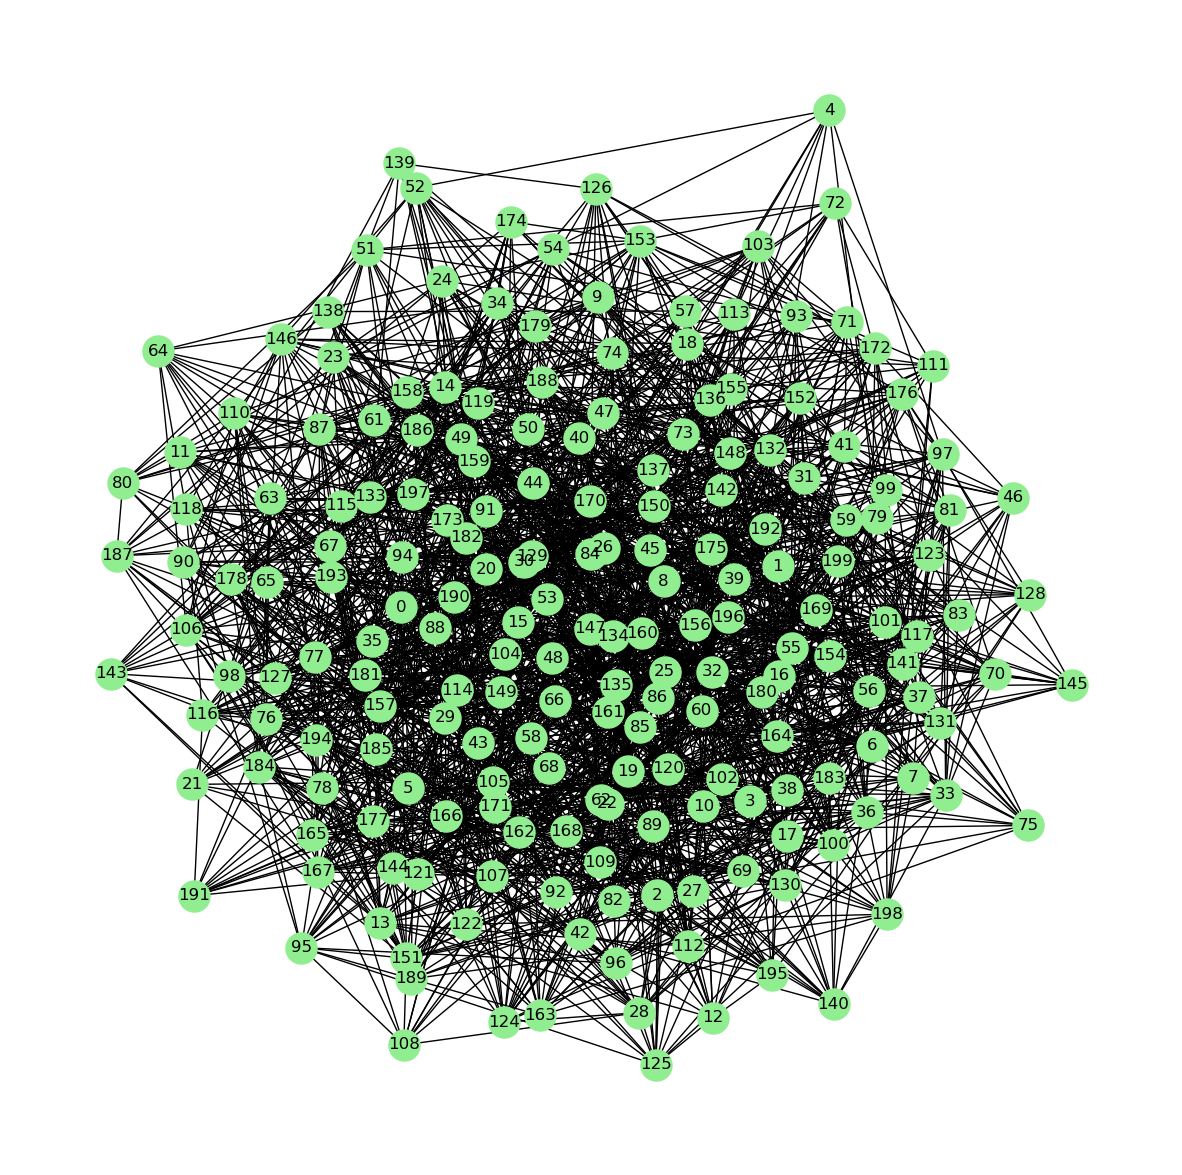

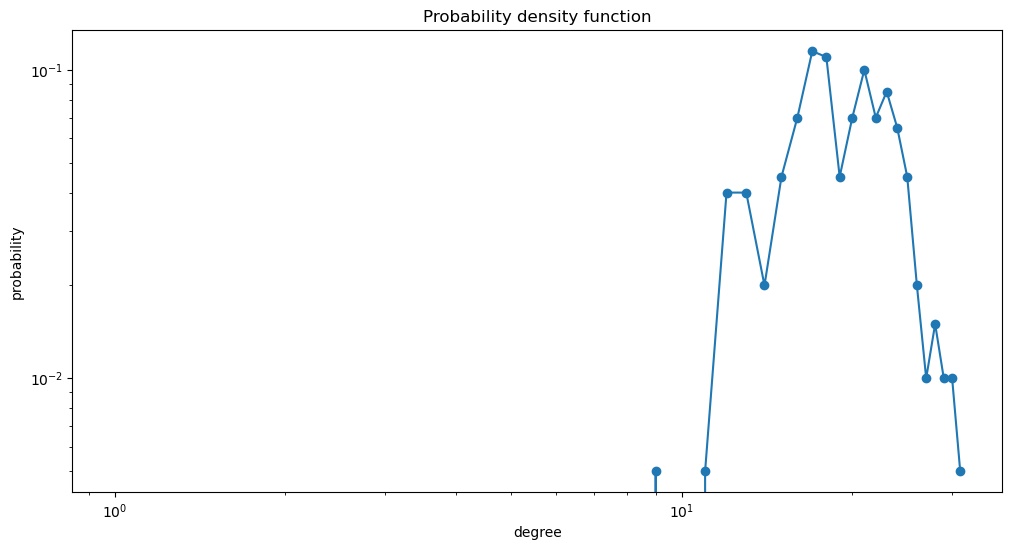

Observed average degree:  19.6  and expected average degree:  19.900000000000002


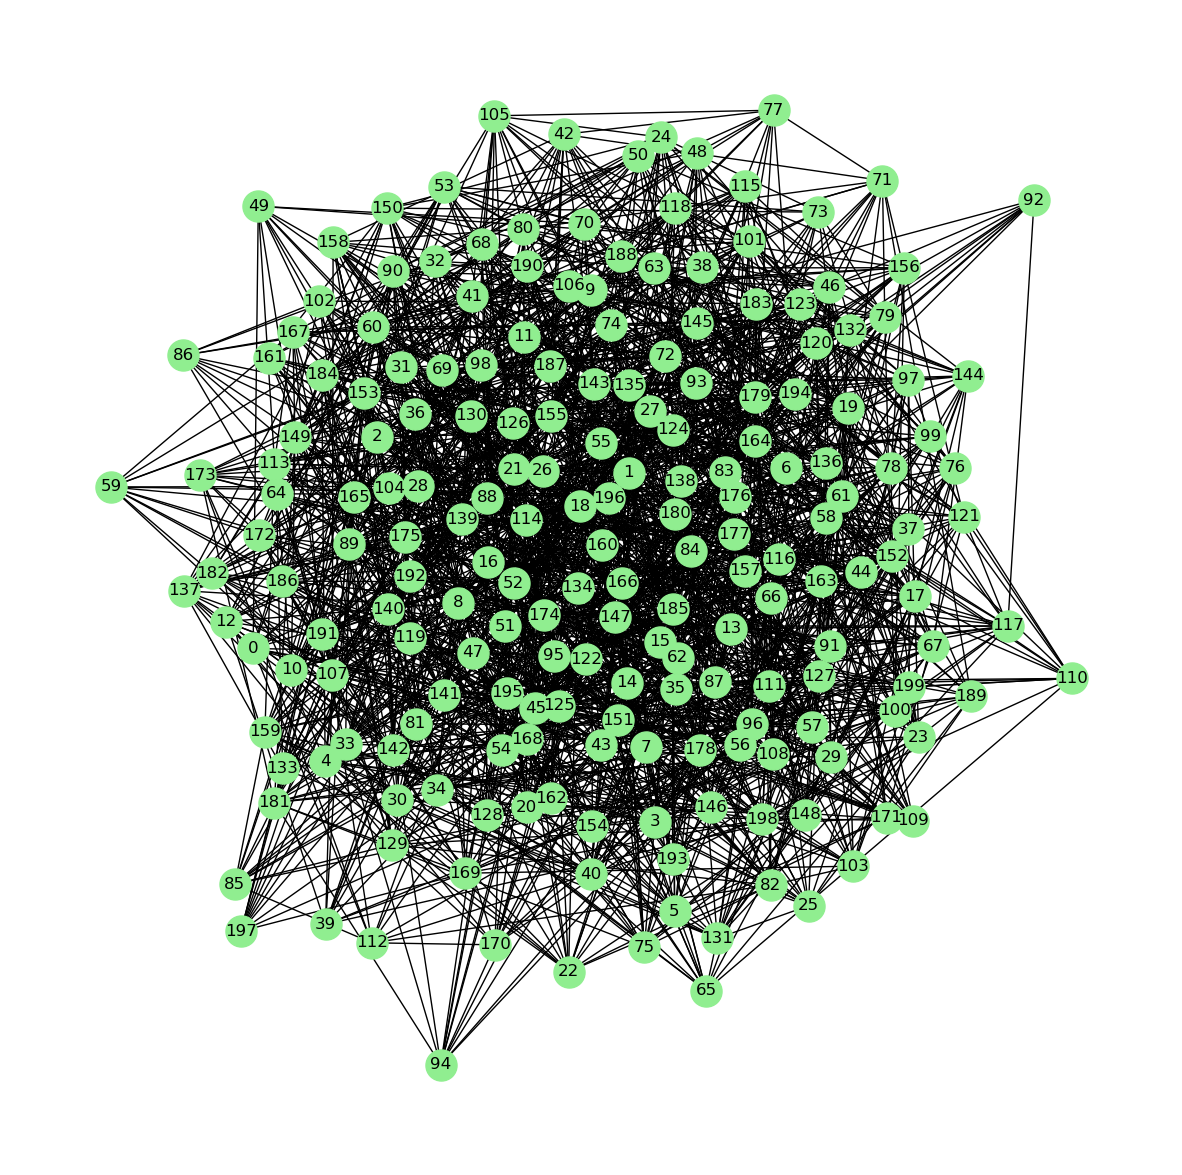

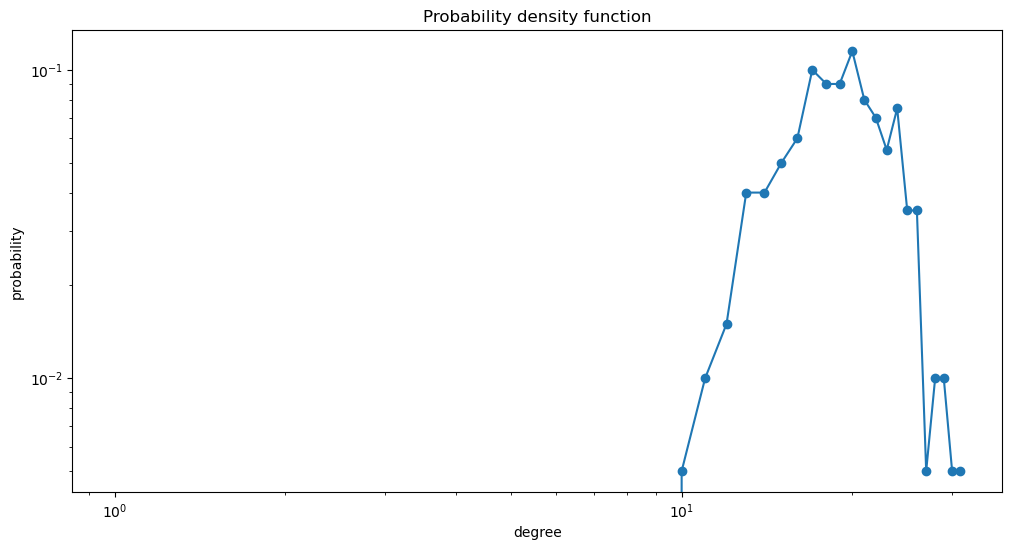

Observed average degree:  19.54  and expected average degree:  19.900000000000002


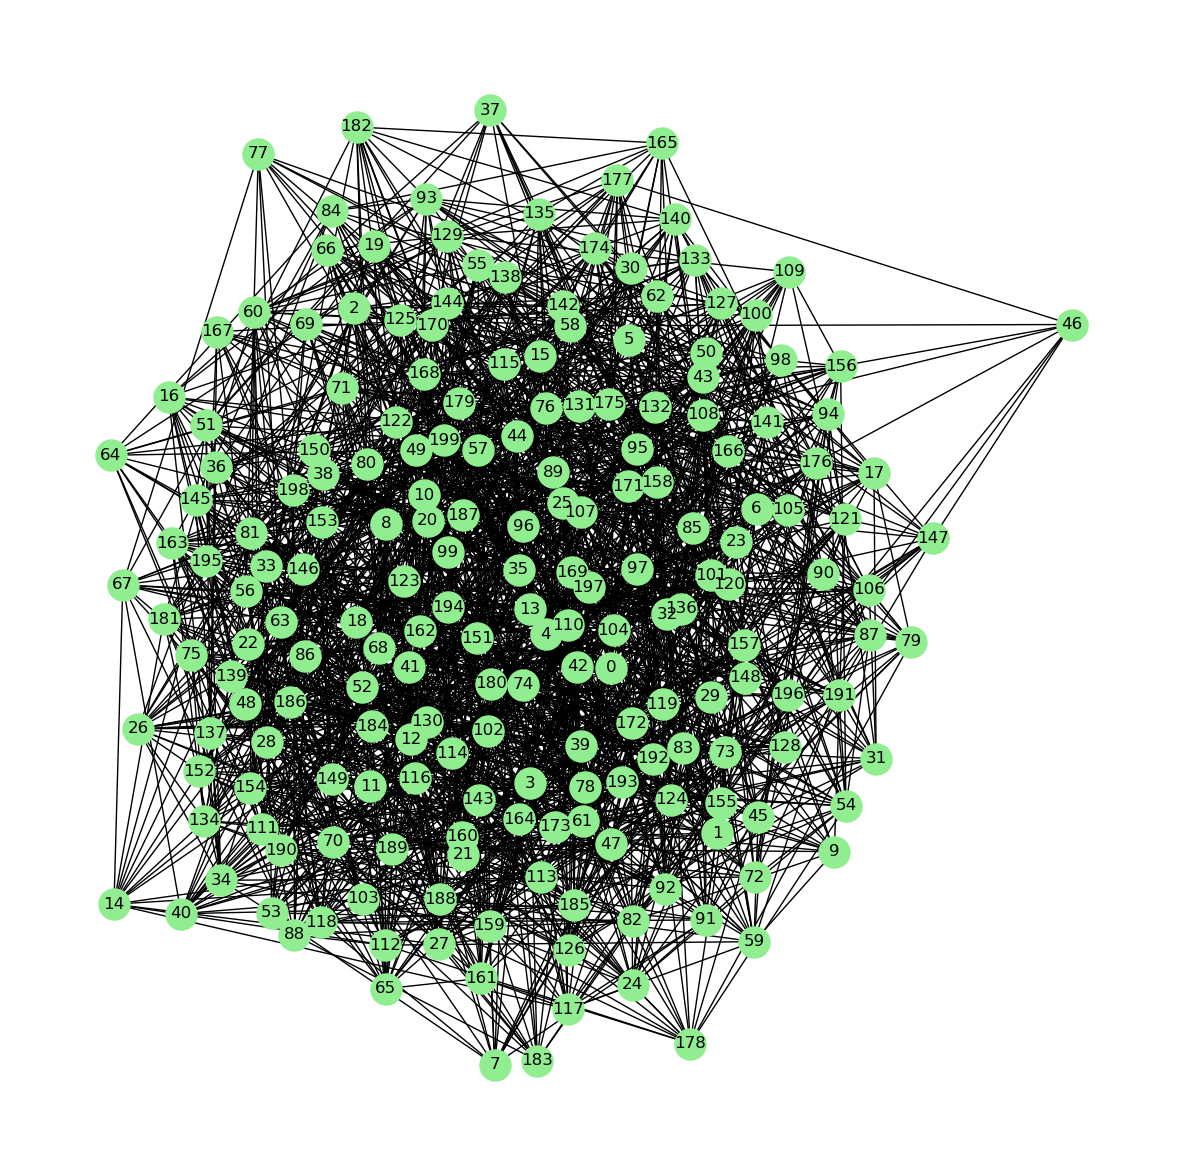

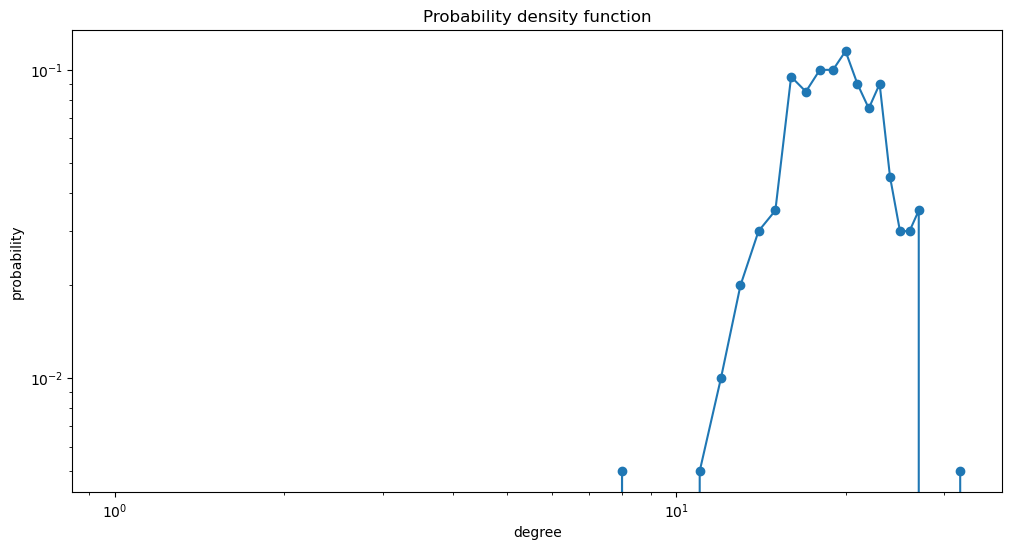

Observed average degree:  19.71  and expected average degree:  19.900000000000002


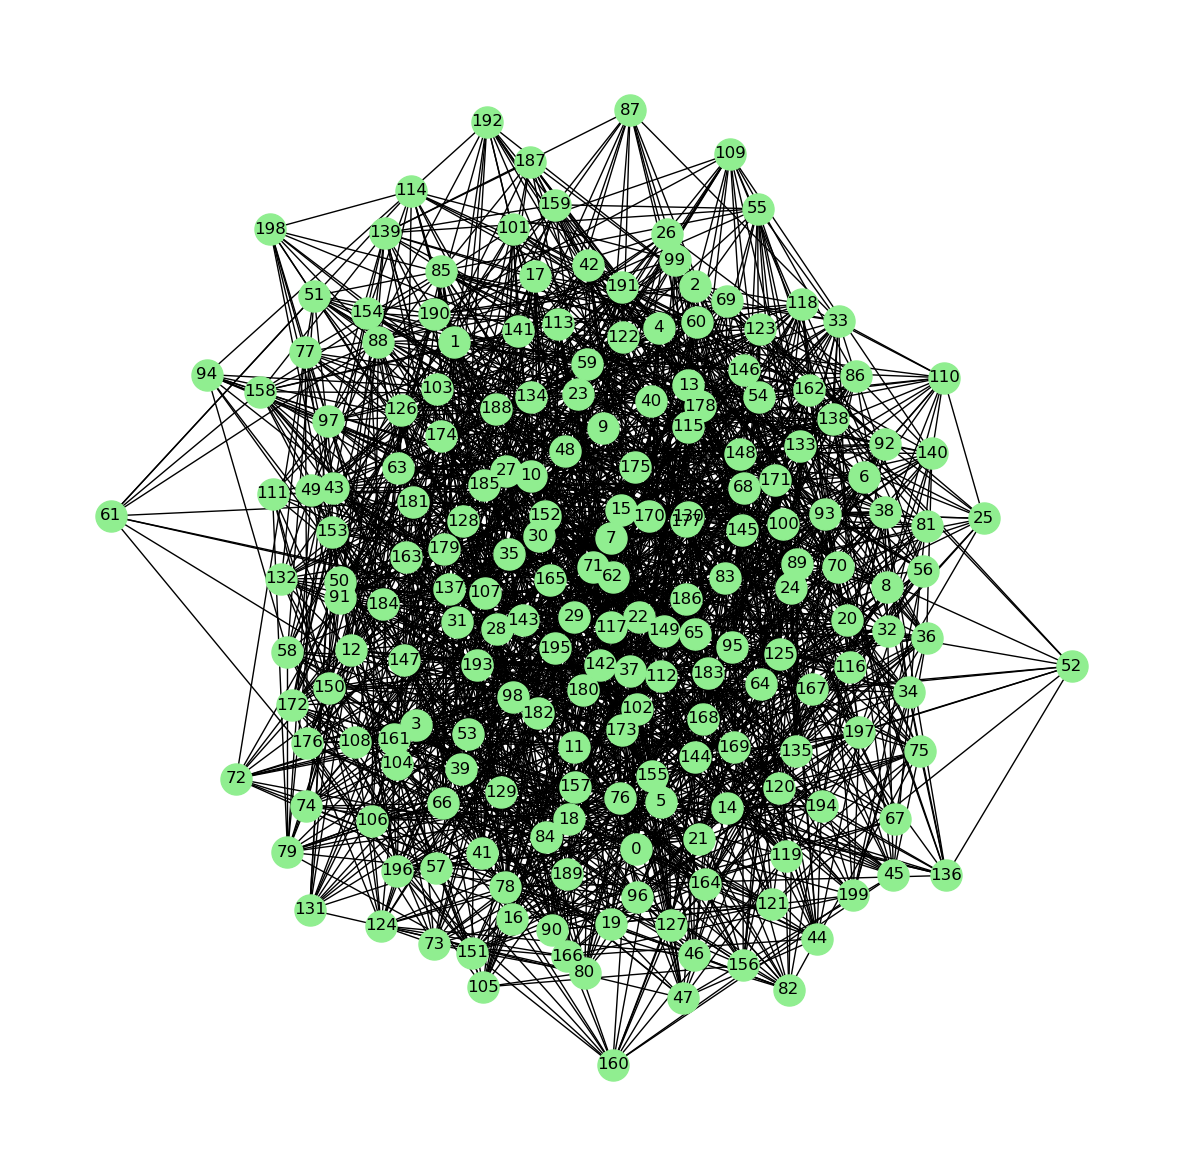

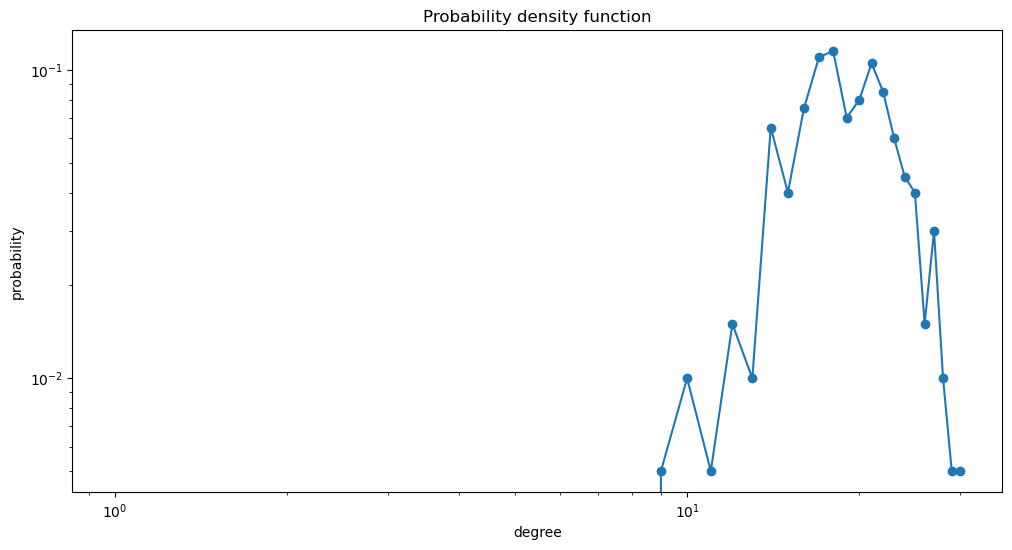

Observed average degree:  19.4  and expected average degree:  19.900000000000002


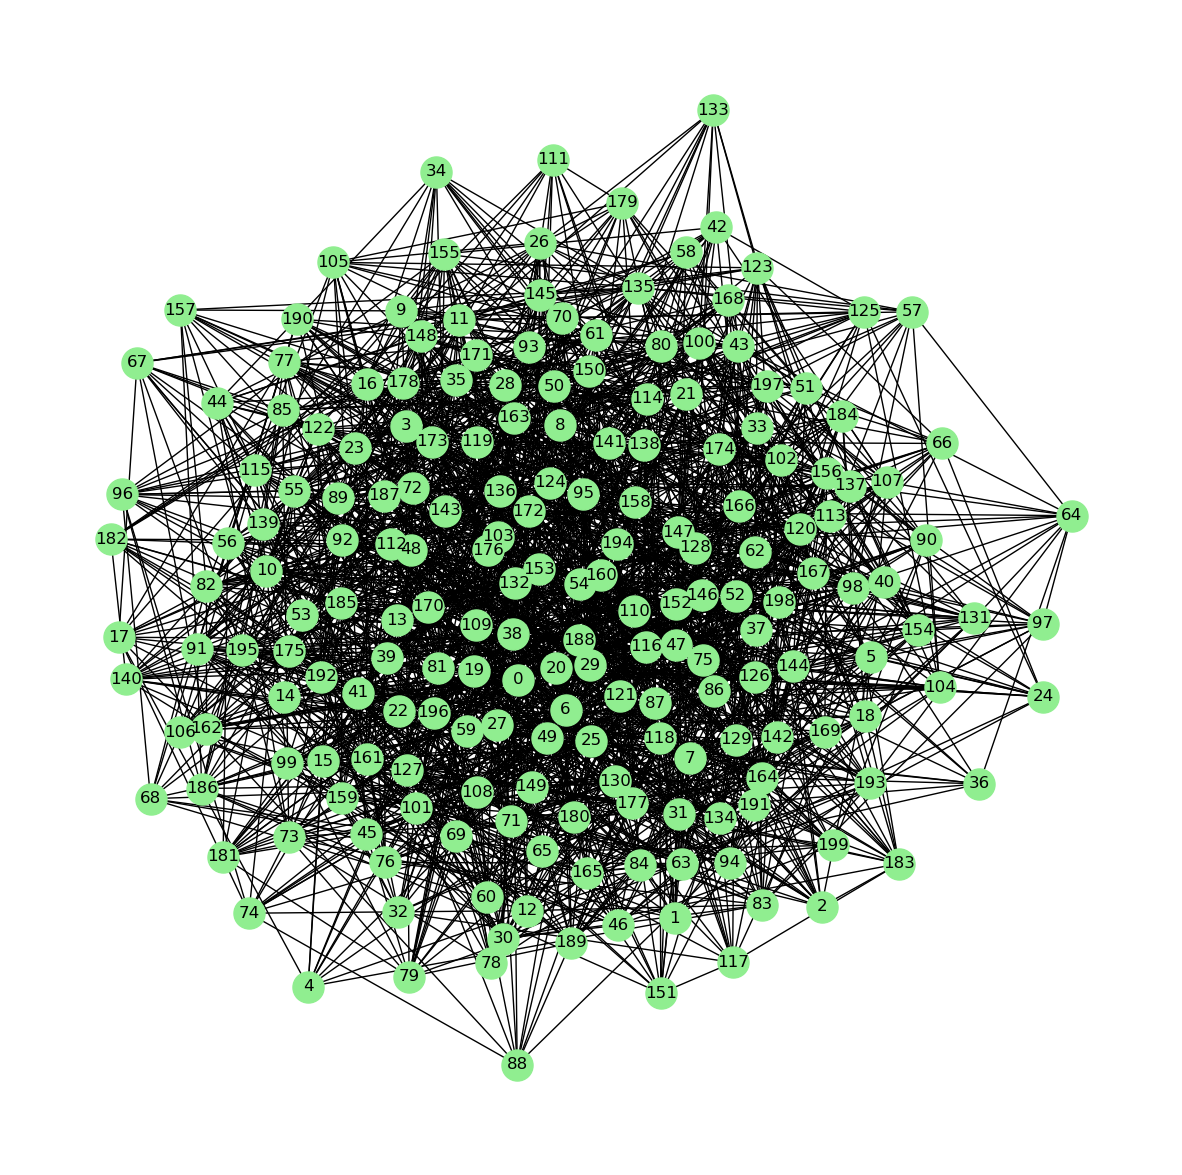

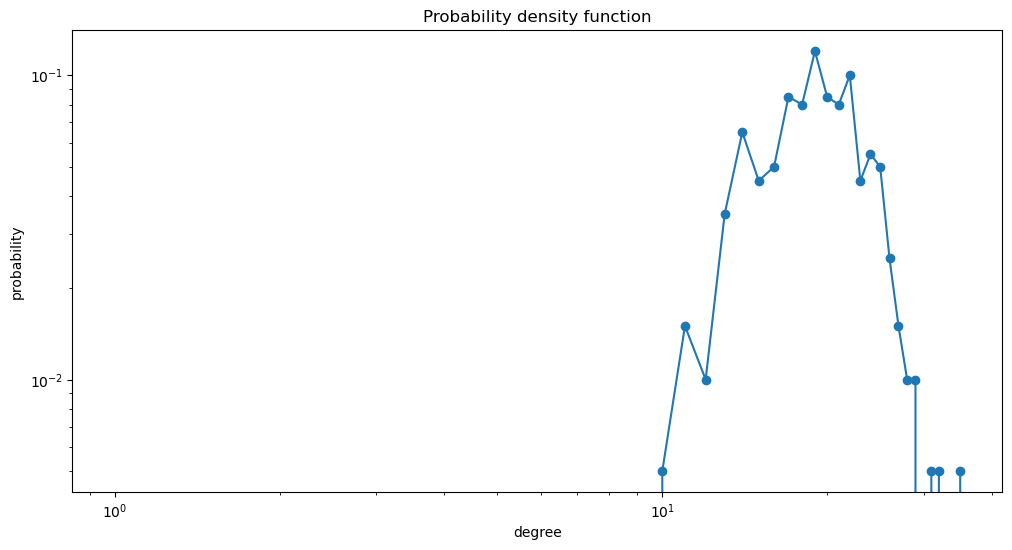

Observed average degree:  19.64  and expected average degree:  19.900000000000002


In [105]:

#defineixo una N i una p 
N=200 #no he pogut escollir una N més gran a 1500, ja que l'ordinador no m'ho permetia a l'hora de fer el graf, i tardava molt en executar
p=0.1

for i in range(5):
    g=generate_random_graph(N,p)#generem el graf
    ##imprimim el graf 
    plt.figure(figsize=(15,15))
    plt.axis('off')
    pos=nx.spring_layout(g)
    nx.draw_networkx(g, pos, with_labels=True, node_size=500, node_color='lightgreen')
    plt.show()
    #dibuixem el graf en un gràfic de barres
    plot_degree_distribution(g)
    print_er_statistics(g,p)#imprimim les estadístiques de cada graf
    

<font size="+1" color="blue">COmenço fent un petit comentari sobre aqust apartat, i es que he escollit una N=200 ja que l ordinador i el programa no em permetien escollir-ne una major de 1500 ja que tardava molt en executar.
Puc observar que el observed average degree de cada graf ronda al voltant de l esperat, a més en el gràfic de la funció de densitat de probabilitat, tots 5 tenen un aspecte similar, amb una forma de campana de Gauss,
en què si fa o no fa tots comencen amb grau 10^1. Pel que fa a la representació gràfica, en els 5 grafs hi ha una majoria de nodes que estan concentrats al centre del graf amb degree alt i una minoria repartits per la perifèria amb menys
degree</font>

# 2. Preferential attachment (BA) generator

In [115]:
# LEAVE AS-IS

def select_with_probability(x, m, p):
    return np.random.choice(x, size=m, replace=False, p=p)

In [116]:
# LEAVE AS-IS

trials = 2000
vector = ['a', 'b', 'c', 'd']
probabilities = [0.60, 0.15, 0.12, 0.13]

all_selected = []
for i in range(trials):
    selected = select_with_probability(vector, 1, probabilities)[0]
    all_selected.append(selected)
    
for i, p in zip(vector, probabilities):
    print("Element {:s} was selected {:d} times, expected {:.0f}".format(i, all_selected.count(i), trials*p) )

Element a was selected 1218 times, expected 1200
Element b was selected 292 times, expected 300
Element c was selected 243 times, expected 240
Element d was selected 247 times, expected 260


In [117]:
def select_targets(g, m):

    # Check if feasible
    N = g.number_of_nodes()  
    if N < m:
        raise ValueError('Graph has less than m nodes')

    # Compute sum of degree
    sum_degree = 0

    # YOUR CODE HERE: COMPUTE SUM OF DEGREE OF NODES
    for i in g.nodes:#a cada iteració, recorrem un node del graf g i sumem el seu grau al contador
        sum_degree+=g.degree[i]
        
    if sum_degree == 0:
        raise ValueError('Graph as no edges')

    # Compute probabilities
    probabilities = []
    for (node, degree) in g.degree():
        probabilitat_del_node=degree/sum_degree#calculo la probabilitat de cada node =grau/sumatori total
        probabilities.append(probabilitat_del_node)#afegim la probabilitat a la llista probabilities
        # YOUR CODE HERE: COMPUTE PROBABILITY OF SELECTING NODE u
        # THEN APPEND IT TO probabilities USING probabilities.append(...)

    # Sample
    selected = select_with_probability(g.nodes(), m, probabilities)

    return selected

In [121]:
# implementation of generate_preferential_attachment_graph(N, m0, m), include comments to explain what you are doing at each step.

def generate_preferential_attachment_graph(N,m0,m):
    if m>m0:#si m>m0 raises a ValueError
        raise ValueError('m>m0')
    graf=nx.Graph()#creo un graf buit
    for i in range(m0):
        graf.add_node(i)#afegeixo nodes de 0 a m0-1
        if i>0:#si i>0 aleshores ja podem començar a crear enllaços entre el node anterior(i-1) i l'actual(i)
            graf.add_edge(i-1,i)
        if i ==(m0-1):#si i es troba a l'última posició afegim un edge entre el node 0  i el m0-1
            graf.add_edge(i,0)
    
    for j in range(m0,N):
        select_targ=select_targets(graf,m) #seleccionem m tergets
        graf.add_node(j)#afegim el node j al graf
        for k in select_targ: #enllacem cada node j a cada target seleccionat
            graf.add_edge(j,k)
    return graf#retornem el graf
    

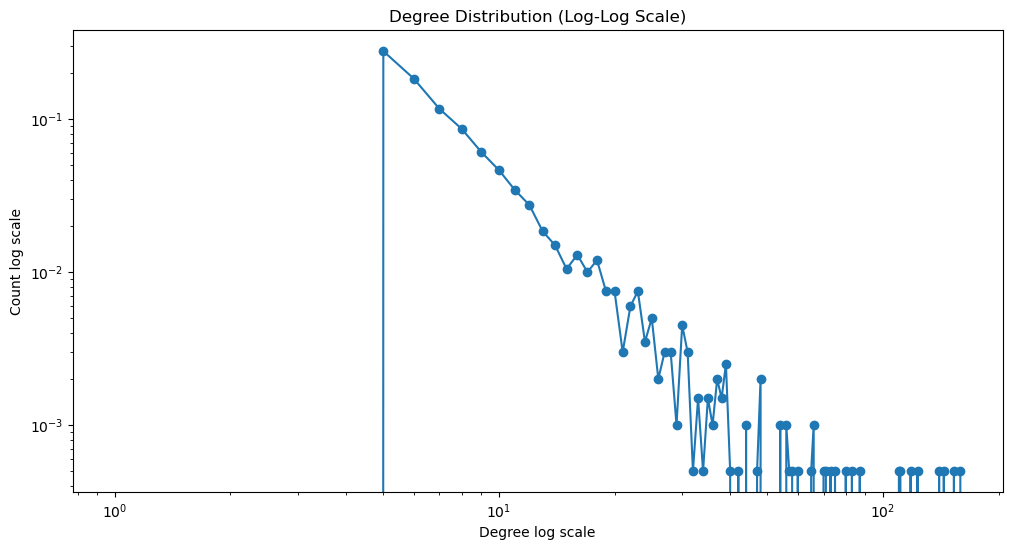

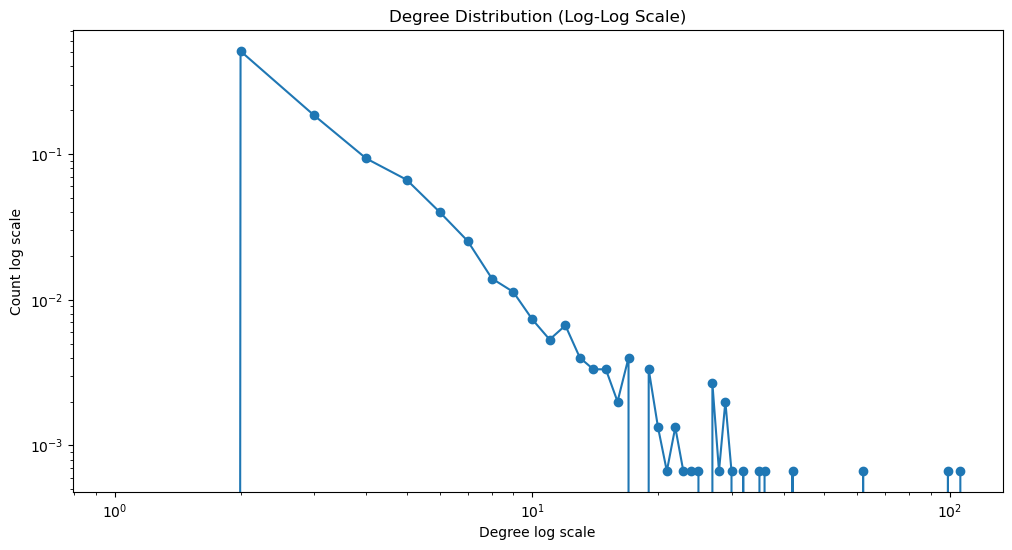

In [128]:

#defineixo variables per al graf 1
N1 = 2000 
m01 = 5   
m1 = 5   
G1 = generate_preferential_attachment_graph(N1, m01, m1)

#defineixo variables per al graf 2
N2 = 1500 
m02 = 2   
m2 = 2    
G2 = generate_preferential_attachment_graph(N2, m02, m2)

def plot_degree_distribution1(g):#reutilitzo la funció plot_degree_distribution i només canvio el nom dels grafics i dels eixos
    degree_dict = dict(g.degree())
    degree_ordered = OrderedDict(sorted(degree_dict.items(), key=lambda x: x[1], reverse=True))
    degree_sequence = list(degree_ordered.values())
    prob, bin_edges = np.histogram(degree_sequence, bins=range(1,np.max(degree_sequence)+2), density=True)
    plt.figure(figsize=(12,6))
    plt.loglog(bin_edges[:-1], prob, 'o-')
    plt.title("Degree Distribution (Log-Log Scale)")
    plt.xlabel("Degree log scale")
    plt.ylabel("Count log scale")
    plt.autoscale(enable=True, axis='both')
    plt.show()

plot_degree_distribution1(G1)
plot_degree_distribution1(G2)

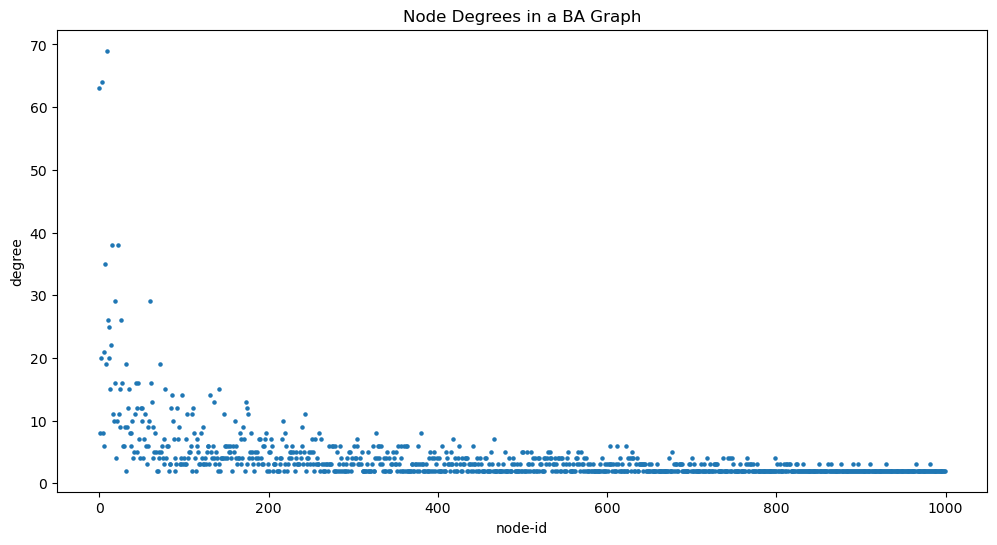

In [147]:
#code to generate a BA graph of 1000 nodes, and then plot in the x axis the node-id and in the y axis the degree of each node. Remember to label both axes.

N=1000#numero de nodes
node_id=[]#definim llistes per guardar els valors
degree_list=[]
g=nx.barabasi_albert_graph(N, 2)#iniciem el graf BA amb connectivitat 2
for i in g.nodes():#afegim el node "i" a la llista de nodes id
    node_id.append(i)
degree_list=[g.degree(j) for j in node_id]#llegim els graus de la llista node_id
    

plt.figure(figsize=(12, 6))
plt.scatter(node_id, degree_list, marker='o', s=5)
plt.title("Node Degrees in a BA Graph")
plt.xlabel("node-id")
plt.ylabel("degree")
plt.show()

<font size="+1" color="blue">Puc observar que el gràfic és discret, en què hi ha un gran nombre de nodes que tenen el mateix grau igual a 2, ja que és el què hem utilitzat per a la connectivitat inicial. Els  nodes amb id entre 0 i 200 és on es concentren aquells amb degree més alt .</font>

<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>